In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

In [3]:
samsung_stock_price = fdr.DataReader('005930','2019')
kospi_index = fdr.DataReader('KS11','2019')

In [4]:
kospi_index = (kospi_index - kospi_index.shift(1)) / kospi_index
samsung_stock_price = (samsung_stock_price - samsung_stock_price.shift(1)) / samsung_stock_price

In [5]:
kospi_index = kospi_index.iloc[1:,:]
samsung_stock_price = samsung_stock_price.iloc[1:,:]

In [6]:
data = pd.concat([kospi_index['Close'], samsung_stock_price['Close']], axis=1)
data.columns = ['KOSPI', 'SAMSUNG']
data = data.dropna()

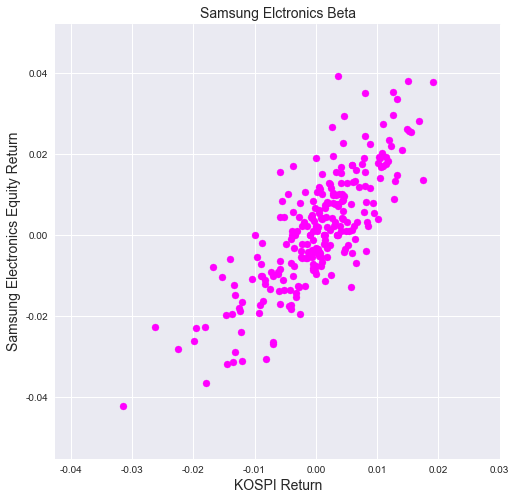

In [7]:
plt.style.use('seaborn')
plt.figure(figsize = (8,8))
plt.title('Samsung Elctronics Beta', fontsize =  14)
plt.xlabel('KOSPI Return', fontsize = 14)
plt.ylabel('Samsung Electronics Equity Return', fontsize = 14)
plt.scatter(data['KOSPI'], data['SAMSUNG'], c = 'magenta')
plt.show()

# beta

In [8]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data['KOSPI']), y = data['SAMSUNG'])
slope = linear_regression.coef_[0].round(3)
print('beta =', slope)

beta = 1.461


# adjusted beta

In [9]:
# adjusted beta
slope_adjusted = slope*(2/3) + (1/3)
print('adjusted beta :', slope_adjusted.round(3))

adjusted beta : 1.307


In [10]:
linear_regression.score(X = pd.DataFrame(data['KOSPI']), y = data['SAMSUNG'])

0.6429621719880265

In [11]:
prediction = linear_regression.predict(X = pd.DataFrame(data['KOSPI']))

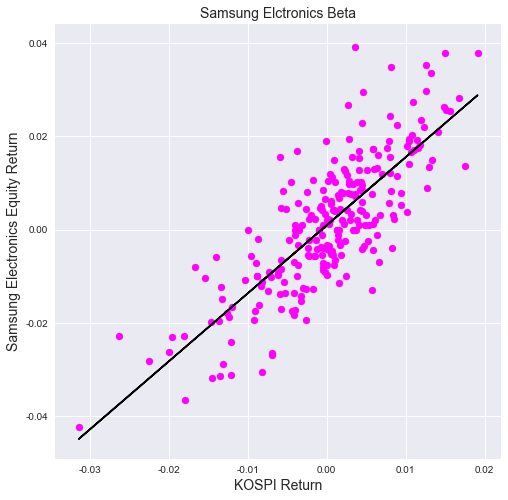

In [12]:
plt.style.use('seaborn')
plt.figure(figsize = (8,8))
plt.title('Samsung Elctronics Beta', fontsize =  14)
plt.xlabel('KOSPI Return', fontsize = 14)
plt.ylabel('Samsung Electronics Equity Return', fontsize = 14)
plt.plot(data['KOSPI'], prediction, c = 'black')
plt.scatter(data['KOSPI'], data['SAMSUNG'], c = 'magenta')
plt.show()

# Fama-French beta

In [13]:
samsung_return = samsung_stock_price[['Close']]
samsung_return = samsung_return.iloc[1: , : ]

kospi_return = kospi_index[['Close']]
kospi_return['Close(t-1)'] = kospi_return.shift(1).dropna()
kospi_return = kospi_return.dropna()

c:\users\gus26\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
linear_regression_post = linear_model.LinearRegression()
linear_regression_post.fit(X = kospi_return, y = samsung_return)
prediction_post = linear_regression_post.predict(X = kospi_return)
print('a value = ', linear_regression_post.intercept_)
print('b balue =', linear_regression_post.coef_)

a value =  [0.00103871]
b balue = [[ 1.45615407 -0.06932945]]


In [15]:
post_ranking_beta = (linear_regression_post.coef_[0][0] + linear_regression_post.coef_[0][1])
print('post-ranking beta : ', post_ranking_beta.round(3))

post-ranking beta :  1.387
